In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Advertising.csv')


In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X=df.drop('sales',axis=1)


In [5]:
y=df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polyConv=PolynomialFeatures(degree=2,include_bias=False)


In [8]:
polyConv.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
polyFeatures=polyConv.transform(X)

In [10]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [11]:
polyFeatures[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(polyFeatures, y,
                                                    test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model=LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
testPredict=model.predict(X_test)

In [18]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
MAE=mean_absolute_error(y_test,testPredict)
MSE=mean_squared_error(y_test,testPredict)
RMSE=np.sqrt(MSE)
print(MAE,RMSE)

0.4896798044803753 0.664643175726923


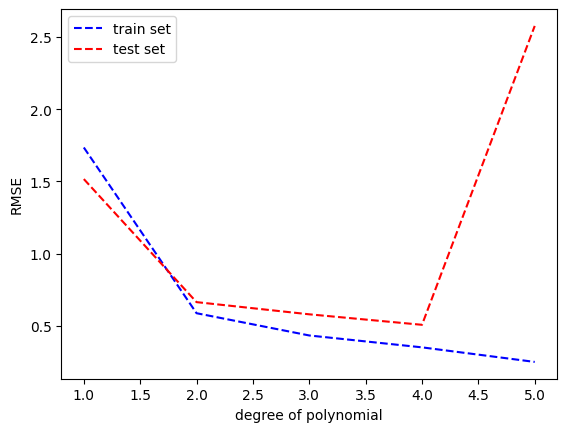

In [21]:
trainRmse=[]
testRmse=[]
for d in range(1,10):
    polyConverter=PolynomialFeatures(degree=d,include_bias=False)
    polyFeatures=polyConverter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(polyFeatures, y,
                                                    test_size=0.3, random_state=101)
    model=LinearRegression()
    model.fit(X_train,y_train)
    testPredict_train=model.predict(X_train)
    testPredict_test=model.predict(X_test)
    
#     MAE=mean_absolute_error(y_test,testPredict)
    MSEtrain=mean_squared_error(y_train,testPredict_train)
    MSEtest=mean_squared_error(y_test,testPredict_test)
    trainRmse.append(np.sqrt(MSEtrain))
    testRmse.append(np.sqrt(MSEtest))
plt.plot(range(1,6),trainRmse[:5],'b--')
plt.plot(range(1,6),testRmse[:5],'r--')
plt.xlabel('degree of polynomial')
plt.ylabel('RMSE')
plt.legend(('train set','test set'))

    

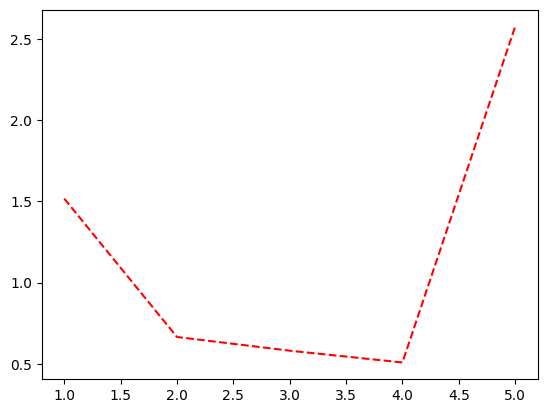

In [22]:
plt.plot(range(1,6),testRmse[:5],'r--')

In [23]:
finalpolyConverter=PolynomialFeatures(degree=3,include_bias=False)
polyFeatures=finalpolyConverter.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(polyFeatures, y,
#                                                 test_size=0.3, random_state=101)
finalmodel=LinearRegression()
finalmodel.fit(polyFeatures,y)


LinearRegression()

In [24]:
from joblib import dump,load

In [25]:
dump(finalmodel,'final_poly_model.joblib')

['final_poly_model.joblib']

In [26]:
dump(finalpolyConverter,'final_convertor.joblib')


['final_convertor.joblib']

In [27]:
loadedConvertor=load('final_convertor.joblib')

In [28]:
loadedModel=load('final_poly_model.joblib')


In [29]:
campaign=[[149,22,12]]

In [30]:
transformedData=loadedConvertor.fit_transform(campaign)

In [31]:
loadedModel.predict(transformedData)

array([14.64501014])